In [7]:
%load_ext rpy2.ipython
import pandas as pd

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [8]:
df = pd.read_csv('http://research.stlouisfed.org/fred2/data/EXJPUS.txt', sep='  ', skiprows=28, engine='python',
                 parse_dates=[0], header=None, names=['Month','Value'])

In [9]:
df.dtypes

Month    datetime64[ns]
Value           float64
dtype: object

In [10]:
df.tail()

,Month,Value
525,2014-10-01,108.0264
526,2014-11-01,116.2994
527,2014-12-01,119.3233
528,2015-01-01,118.2500
529,2015-02-01,118.4770


In [12]:
%R -i df

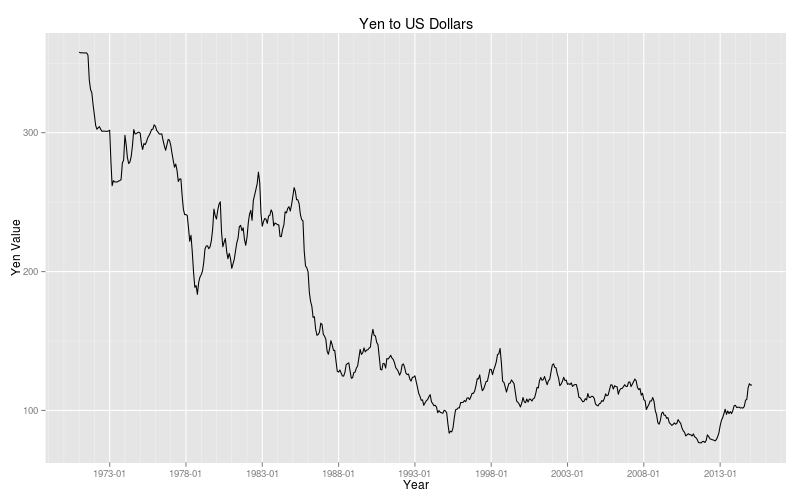

In [15]:
%%R -w 800 -h 500 -u px # instead of px, you can also choose 'in', 'cm', or 'mm'
df = as.data.frame(df)  # ensure dataframe that was passed in from Python will be R's dataframe type
library(ggplot2)
library(scales)
p = ggplot(df, aes(df$Month, df$Value))
p = p + 
    geom_line() +
    scale_x_datetime(labels=date_format("%Y-%m"), breaks="5 years", minor_breaks="1 year") +
    ggtitle("Yen to US Dollars") +
    xlab("Year") +
    ylab("Yen Value")
print(p)